# Netflix Data Project

In [ ]:
 # following this: https://www.dataquest.io/blog/python-tutorial-analyze-personal-netflix-data/

In [4]:
import pandas as pd

df = pd.read_csv('ViewingActivity.csv')

In [5]:

df.shape



(2239, 10)

In [19]:
df.head()

,Start Time,Duration,Title
0,2025-01-12 19:40:26+00:00,0 days 01:04:24,Cocaine Bear
1,2025-01-12 19:40:13+00:00,0 days 00:00:09,Cocaine Bear_hook_03_16x9
2,2025-01-11 19:41:59+00:00,0 days 00:45:15,Blood & Gold
3,2025-01-11 19:41:04+00:00,0 days 00:00:07,Capone_hook_02_16x9
4,2025-01-11 19:40:48+00:00,0 days 00:00:06,Drive_hook_07_16x9


In [7]:
# Dropping unnecessary columns


df = df.drop(['Profile Name','Attributes', 'Supplemental Video Type', 'Device Type','Bookmark', 'Latest Bookmark', 'Country'], axis=1)

df.head(1)

,Start Time,Duration,Title
0,2025-01-12 19:40:26,01:04:24,Cocaine Bear


In [8]:
# Converting Strngs to Datetime and Timedelta in Pandas

df.dtypes

Start Time    object
Duration      object
Title         object
dtype: object

In [9]:

df['Start Time'] = pd.to_datetime(df['Start Time'], utc=True)
df.dtypes





Start Time    datetime64[ns, UTC]
Duration                   object
Title                      object
dtype: object

In [15]:
# change the Start Time column into the dataframe's index
df = df.set_index('Start Time')

# convert from UTC timezone to eastern time
df.index.tz_convert('GMT')

# reset the index so that Start Time becomes a column again
df = df.reset_index()

# double check that it worked 
df.head(1)




,Start Time,Duration,Title
0,2025-01-12 19:40:26+00:00,01:04:24,Cocaine Bear


In [18]:
# Convertine Duraion to timedelta

df['Duration'] = pd.to_timedelta(df['Duration'])
df.dtypes

Start Time    datetime64[ns, UTC]
Duration          timedelta64[ns]
Title                      object
dtype: object

### Filtering strings by Substring in Pandas using str.contains

In [23]:

# create a new dataframe called cobra_kai that takes from df 
# only the rows in which the Title column contains 'Cobra Kai'
cobra_kai = df[df['Title'].str.contains('Cobra Kai', regex=False)]

In [24]:
cobra_kai.shape

(94, 3)

### Filtering out short durations using timedelta

In [26]:
# filtering out preview auto-plays

cobra_kai = cobra_kai[(cobra_kai['Duration'] > '0 days 00:01:00')]
cobra_kai.shape

(54, 3)

### Analysing the Data

In [27]:
# How much time have I spent watching Cobra Kai? 

cobra_kai['Duration'].sum()

Timedelta('1 days 02:28:35')

In [28]:
# When do I watch Cobra Kai?
# Which days of the week?
# Which hours of the day? 

cobra_kai['weekday'] = cobra_kai['Start Time'].dt.weekday
cobra_kai['hour'] = cobra_kai['Start Time'].dt.hour

cobra_kai.head(1)

,Start Time,Duration,Title,weekday,hour
44,2024-12-29 20:05:39+00:00,0 days 00:42:46,Cobra Kai: Season 6: Eunjangdo (Episode 10),6,20


In [ ]:
# Get a graph going...

In [30]:
%matplotlib inline
import matplotlib

<AxesSubplot:title={'center':'Cobra Kai Episodes Watched by Day'}>

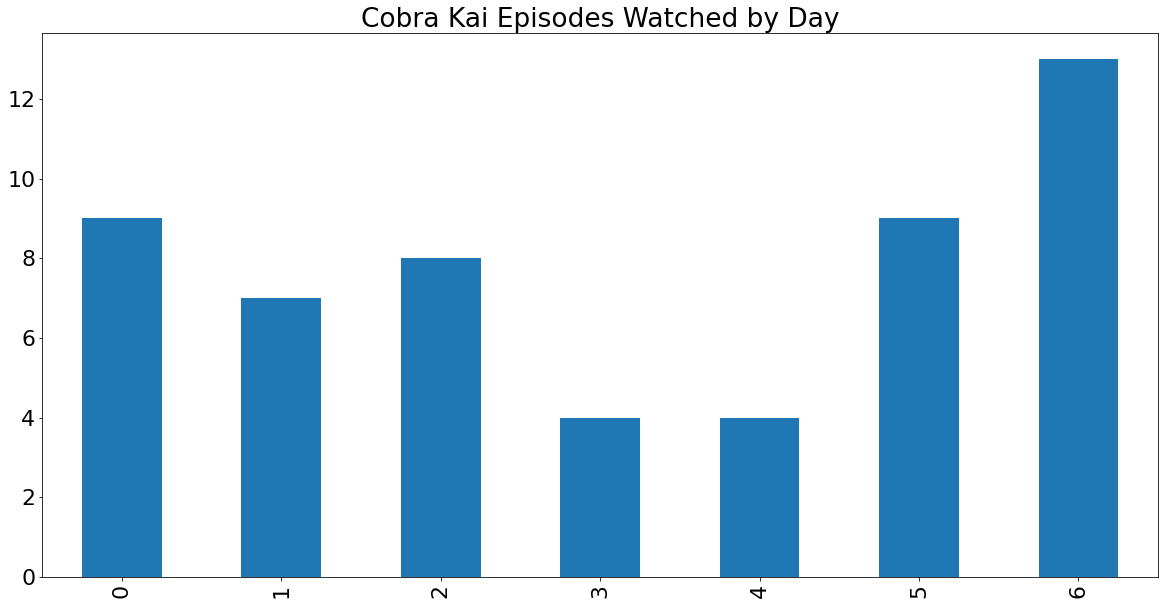

In [32]:
# set our categorical and define the order so the days are plotted Monday - Sunday 

cobra_kai['weekday'] = pd.Categorical(cobra_kai['weekday'], categories=[0,1,2,3,4,5,6], ordered=True)

# create kai_by_day and count the rows for each weekday, assigning the result to that variable
kai_by_day = cobra_kai['weekday'].value_counts()

# sort the index using ot categorical, so that Monday (0) is first, Tuesday (1) is second, etc. 
kai_by_day = kai_by_day.sort_index()

# optional: update the font to make it a touch larger and easier to read
matplotlib.rcParams.update({'font.size': 22})

# plot office_by_day as a bar chart with the listed size and title
kai_by_day.plot(kind='bar', figsize=(20,10), title='Cobra Kai Episodes Watched by Day')

<AxesSubplot:title={'center':'Cobra Kai Episodes Watched by Hour'}>

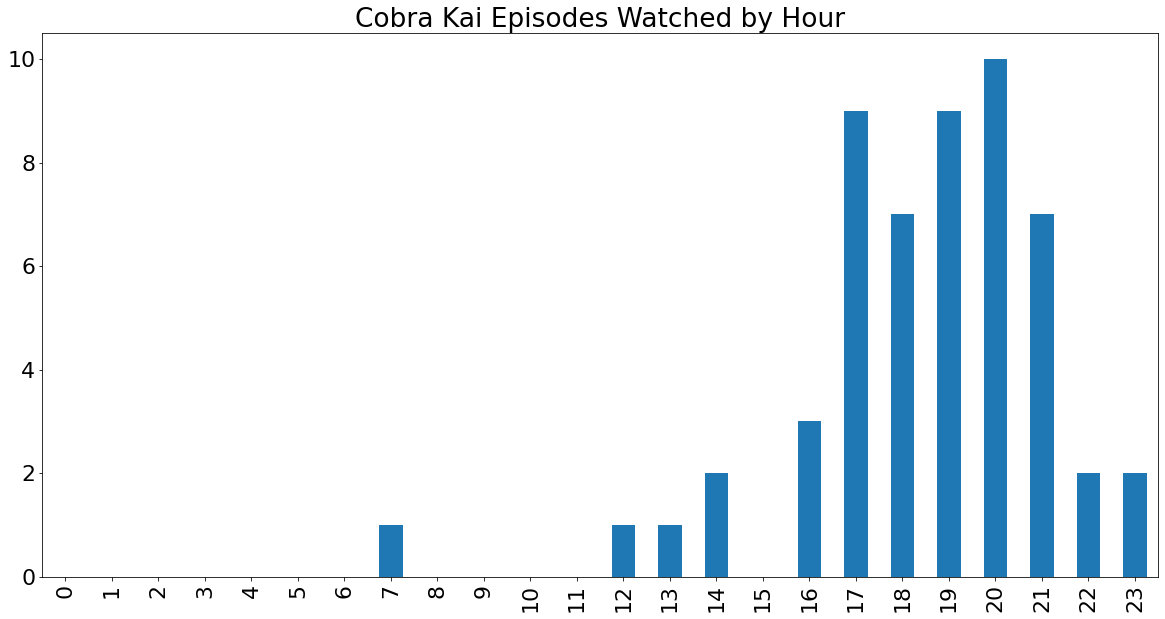

In [33]:
### What about hours in the day? 

# set our categorical and define the order so the hours are plotted 0-23

cobra_kai['hour'] = pd.Categorical(cobra_kai['hour'], categories=[0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20,21,22,23],
                                   ordered=True)

# create kai_by_hour and count the rows for each hour, assigning the result to that variable
kai_by_hour = cobra_kai['hour'].value_counts()

# sort the index using our categorical, so that midnight (0) is first, 1 a.m (1) is second, etc. 
kai_by_hour = kai_by_hour.sort_index()



# plot kai_by_hour as a bar chart with the listed size and title
kai_by_hour.plot(kind='bar', figsize=(20,10), title='Cobra Kai Episodes Watched by Hour')